Milestone 2_Khan

811286910

Milestone 2 - Visualization and Initial Analysis

Link to dataset:

https://www.kaggle.com/datasets/aungpyaeap/movie-streaming-datasets-iflix

https://tianchi.aliyun.com/dataset/90385



This dataset from a iflix datathon in 2019, that I found on Kaggle and a Chinese data site, is a valuable resource for understanding movie streaming trends and audience behavior. The fact that it’s available on both a global platform like Kaggle and an independent source enhances its credibility.

Containing information on genres, demographics, engagement rates, and viewing habits, this dataset offers a deep dive into what viewers are watching, when, and why. By studying it, streaming service iflix, advertisers, and content creators can make more informed choices, like which types of movies to promote or the best times to release new content. These insights can lead to smarter recommendations, happier viewers, and more targeted advertising. Plus, it’s a great base for building models that predict what audiences might watch next based on the confidence score and can be sued to train the odels, helping to stay one step ahead in the fast-paced streaming industry. This dataset isn’t just reliable—it’s a powerful way to understand and connect with viewers on a new level.

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [110]:
users = pd.read_csv("users.csv")
users.head(1)

,user_id,country_code
0,781684047872,ID


In [111]:
plays = pd.read_csv("plays.csv")
plays.head(1)

,user_id,platform,asset_id,minutes_viewed
0,764504178919,android,13758,28


In [112]:
psychographics = pd.read_csv("psychographics.csv")
psychographics.head(1)

,user_id,platform,level_1,level_2,level_3,confidence_score
0,352187318551,android,Psychographics,Social Media Fans,"\""\""",1.0


In [113]:
demographics = pd.read_csv("demographics.csv")
demographics.head(1)

,user_id,platform,level_1,level_2,level_3,confidence_score
0,171798691973,android,Demographics,Income,Medium,1.0


In [114]:
assets = pd.read_csv("assets.csv")
assets.head(1)

,show_type,genre,running_minutes,source_language,asset_id,season_id,series_id,studio_id
0,Movies,Sci-Fi,146,English,1,NaN,NaN,325.0


# Assets.csv

In [115]:
assets.shape

(17271, 8)

In [116]:
assets.columns

Index(['show_type', 'genre', 'running_minutes', 'source_language', 'asset_id',
       'season_id', 'series_id', 'studio_id'],
      dtype='object')

In [117]:
# Finding all the nan counts

nan_counts = assets.isna().sum()
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
show_type             0
genre                 1
running_minutes       0
source_language     192
asset_id              0
season_id          3293
series_id          3293
studio_id             2
dtype: int64


In [118]:
# Defining the columns I want to retrieve unique values for

columns_to_check = ['show_type', 'genre', 'source_language']

# Loop through each specified column and print unique values

for column in columns_to_check:
    unique_values = assets[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'show_type':
['Movies' 'TV']


Unique values in 'genre':
['Sci-Fi' 'Documentary and Biography' 'Reality' 'Comedy' 'Kids'
 'Action and Adventure' 'Drama' 'Fantasy' 'Romance' 'Horror'
 'Crime and Mystery' 'Others' 'Lifestyle and Fashion' 'Anime' 'Thriller'
 'Music' 'Sports' 'Adult Romance' 'Animation' 'Family' 'eSports' nan
 'Health and Fitness' 'Live Events and Specials' 'News'
 'Religion and Faith' 'Best of Web or Viral' 'Education' 'Extreme Sports'
 'Game Show']


Unique values in 'source_language':
['English' nan 'Korean' 'Malay' 'Chinese' 'Japanese' 'Thai' 'Tagalog'
 'Italian' 'Indonesian' 'Danish' 'Hindi' 'Vietnamese' 'Burmese' 'Arabic'
 'Norwegian' 'Tajik' 'Afrikaans' 'French' 'Kazakh' 'Spanish; Castilian'
 'Akan' 'Swedish' 'Hungarian' 'Urdu' 'German' 'Central Khmer' 'Kanuri'
 'Bengali' 'Swahili' 'Portuguese' 'Turkish' 'Avaric' 'Russian'
 'Sinhala; Sinhalese' 'Nepali' 'Esperanto' 'Dutch; Flemish' 'Tamil'
 'Catalan; Valencian' 'Macedonian']




Here I have organized columns in show_type, genre and source_language in ascending order. Also I have replaced all the NaN values in above columns to 0 for example for a particular genre there is no data available then I'm assuming there is no movie or tv show in that gener. For rest of the columns I kept NaN as NaN.

Also I want to see how frequently a genre has been viewed.

In [119]:
# Create a unique combination of 'show_type', 'genre', and 'source_language'
combinations = assets[['show_type', 'genre', 'source_language']].drop_duplicates()

# Merge with the original DataFrame to show all instances with the specified columns
merged_data = combinations.merge(assets)

# Fill missing values in the specified columns with 0
merged_data[['show_type', 'genre', 'source_language']] = merged_data[['show_type', 'genre', 'source_language']].fillna(0)

# Sort the DataFrame in ascending order by 'show_type', 'genre', and 'source_language'
merged_data_assets = merged_data.sort_values(by=['show_type', 'genre', 'source_language'], ascending=True)

# Display the result
merged_data_assets

,show_type,genre,source_language,running_minutes,asset_id,season_id,series_id,studio_id
15141,Movies,0,English,6,6697,NaN,NaN,454.0
13800,Movies,Action and Adventure,0,96,3424,NaN,NaN,10.0
14040,Movies,Action and Adventure,Arabic,144,3554,NaN,NaN,140.0
14041,Movies,Action and Adventure,Arabic,127,3555,NaN,NaN,140.0
14042,Movies,Action and Adventure,Arabic,96,3612,NaN,NaN,140.0
...,...,...,...,...,...,...,...,...
16371,TV,eSports,Malay,88,11136,971.0,815.0,388.0
16372,TV,eSports,Malay,6,11153,973.0,817.0,388.0
16373,TV,eSports,Malay,8,11154,973.0,817.0,388.0
16374,TV,eSports,Malay,57,11155,974.0,818.0,388.0


Here I have grouped 3 columns by their frequency as I want to plot a relationship between show_type, genre, source_language

In [120]:
# Group the assets DataFrame by the specified levels
group_by_assets = assets.groupby(['show_type', 'genre', 'source_language']).size()

group_by_assets.head()

show_type  genre                 source_language
Movies     Action and Adventure  Arabic              17
                                 Bengali              4
                                 Burmese              1
                                 Chinese             69
                                 English            220
dtype: int64

In [121]:
group_by_assets = assets.groupby(['show_type', 'genre', 'source_language']).size().unstack(fill_value=0)

group_by_assets.head(1)

,source_language,Afrikaans,Akan,Arabic,Avaric,Bengali,Burmese,Catalan; Valencian,Central Khmer,Chinese,Danish,...,Spanish; Castilian,Swahili,Swedish,Tagalog,Tajik,Tamil,Thai,Turkish,Urdu,Vietnamese
show_type,genre,,,,,,,,,,,,,,,,,,,,,
Movies,Action and Adventure,0,0,17,0,4,1,0,0,69,0,...,1,0,0,12,1,19,8,2,1,3


# Here I'm developing some of the basic visualizations based on the dataset. There is some messyness in one of the graph called Studio Contribution. Will try to make some amends around it in milestone 3.

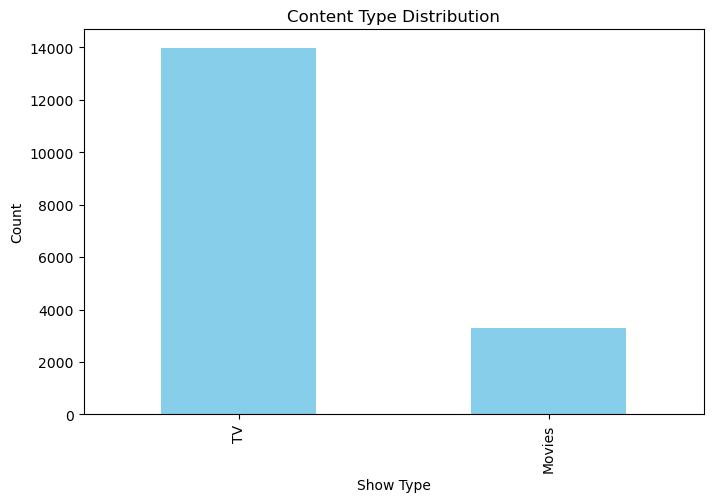

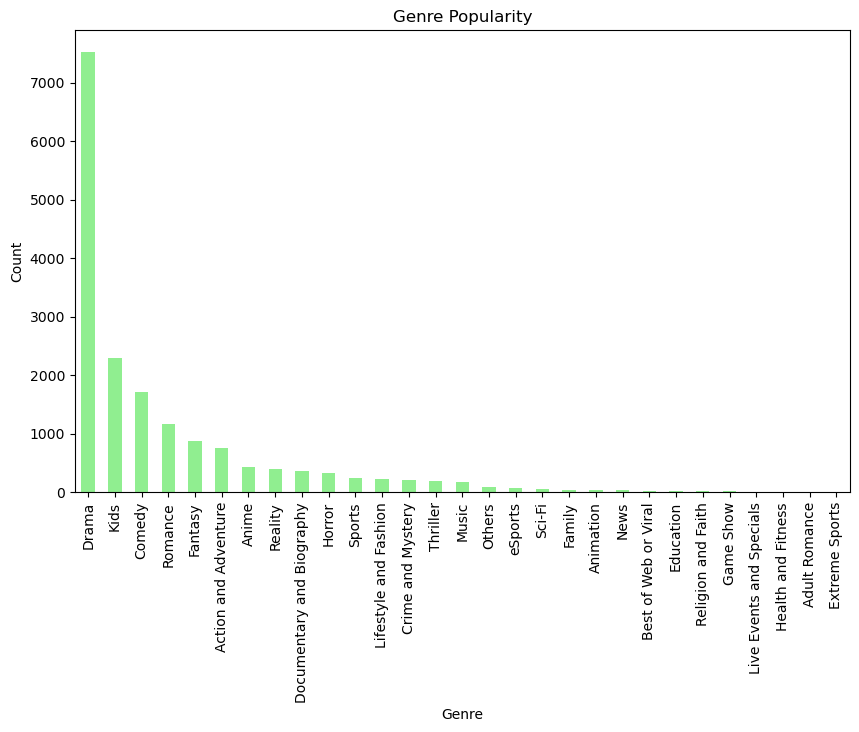

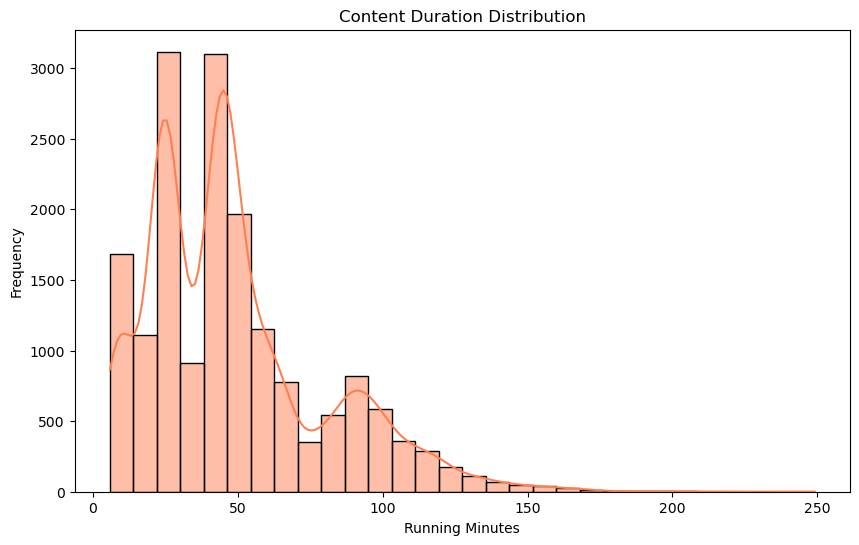

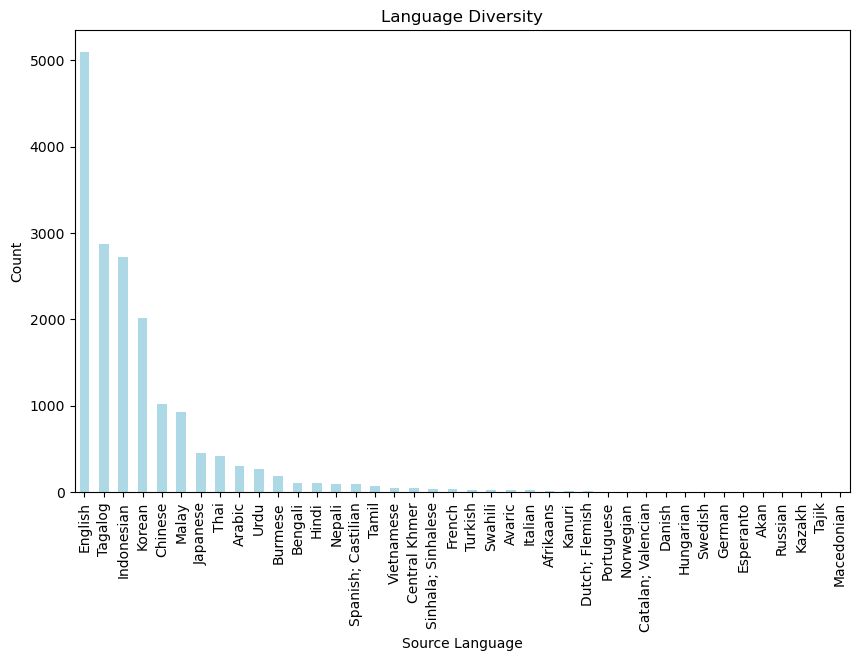

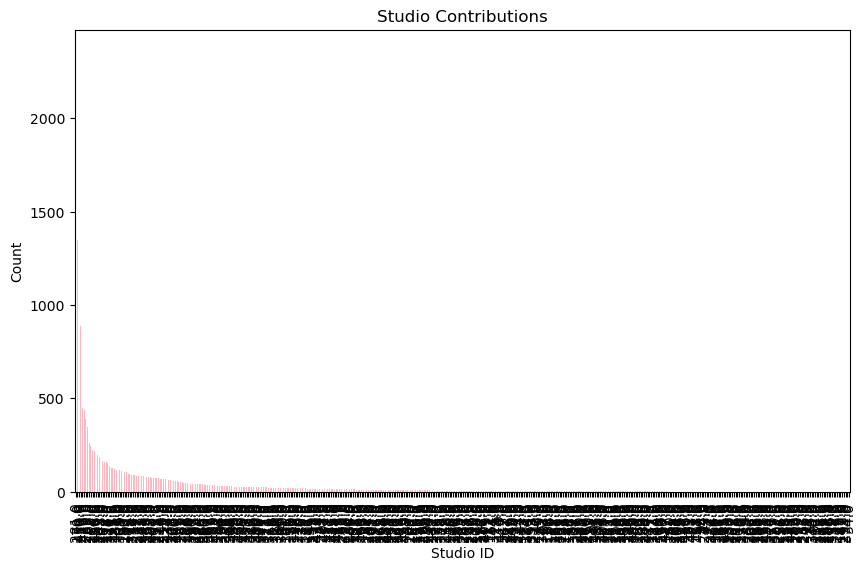

In [122]:
# 1. Content Type Distribution
plt.figure(figsize=(8, 5))
assets['show_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Content Type Distribution')
plt.xlabel('Show Type')
plt.ylabel('Count')
plt.show()

# 2. Genre Popularity
plt.figure(figsize=(10, 6))
assets['genre'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# 3. Content Duration Analysis
plt.figure(figsize=(10, 6))
sns.histplot(assets['running_minutes'], kde=True, color='coral', bins=30)
plt.title('Content Duration Distribution')
plt.xlabel('Running Minutes')
plt.ylabel('Frequency')
plt.show()

# 4. Language Diversity
plt.figure(figsize=(10, 6))
assets['source_language'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Language Diversity')
plt.xlabel('Source Language')
plt.ylabel('Count')
plt.show()

# 5. Studio Contributions
plt.figure(figsize=(10, 6))
assets['studio_id'].value_counts().plot(kind='bar', color='lightpink')
plt.title('Studio Contributions')
plt.xlabel('Studio ID')
plt.ylabel('Count')
plt.show()

# This is a histogram for the Content Duration Distribution by Genre. This inclues one histogram for one genre which is just not good and I'll pick a few of these genre to get insights from; in milestone 3.

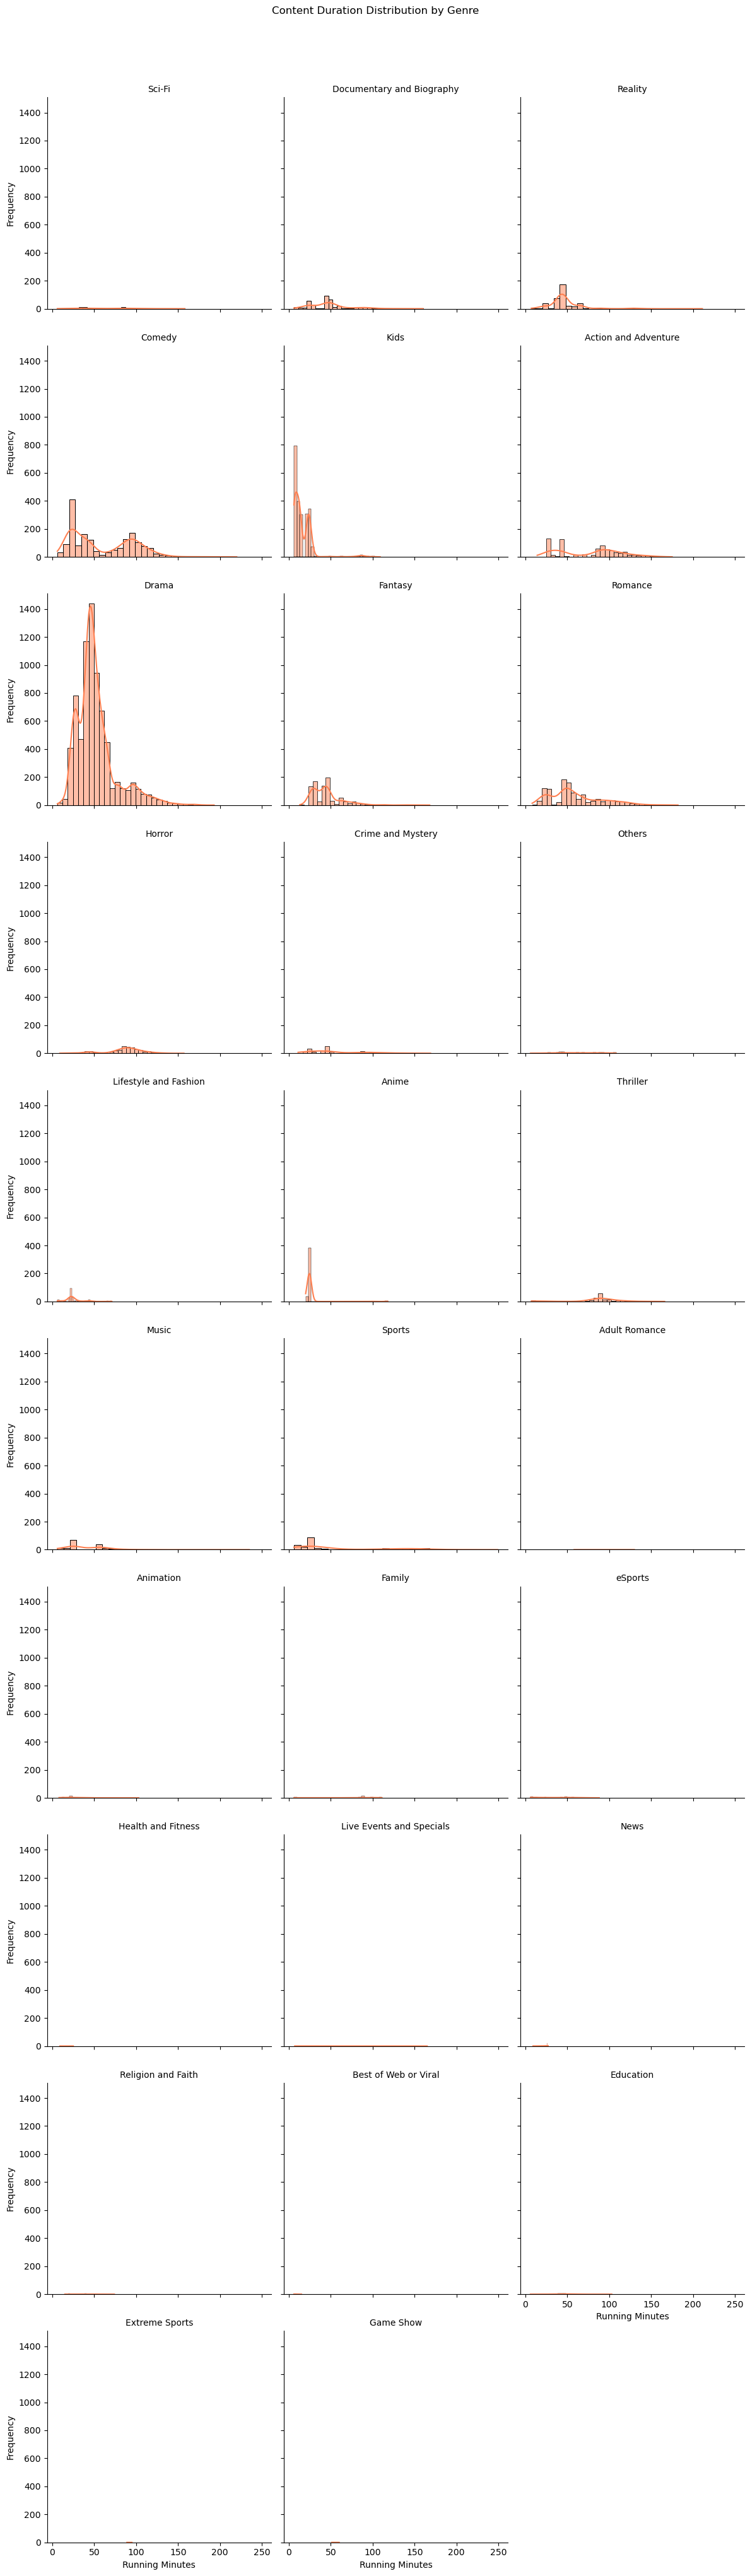

In [123]:
# Set up a FacetGrid to create separate histograms for each genre
g = sns.FacetGrid(assets, col="genre", col_wrap=3, height=4, sharex=True, sharey=True)
g.map(sns.histplot, "running_minutes", kde=True, color="coral", bins=30)

# Set the titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Running Minutes", "Frequency")
plt.suptitle("Content Duration Distribution by Genre", y=1.02)
plt.tight_layout()
plt.show()

# I just found about this violin plot and wanted to try it out. Looks fancy but doesn't serve my purpose.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1656\3605132300.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




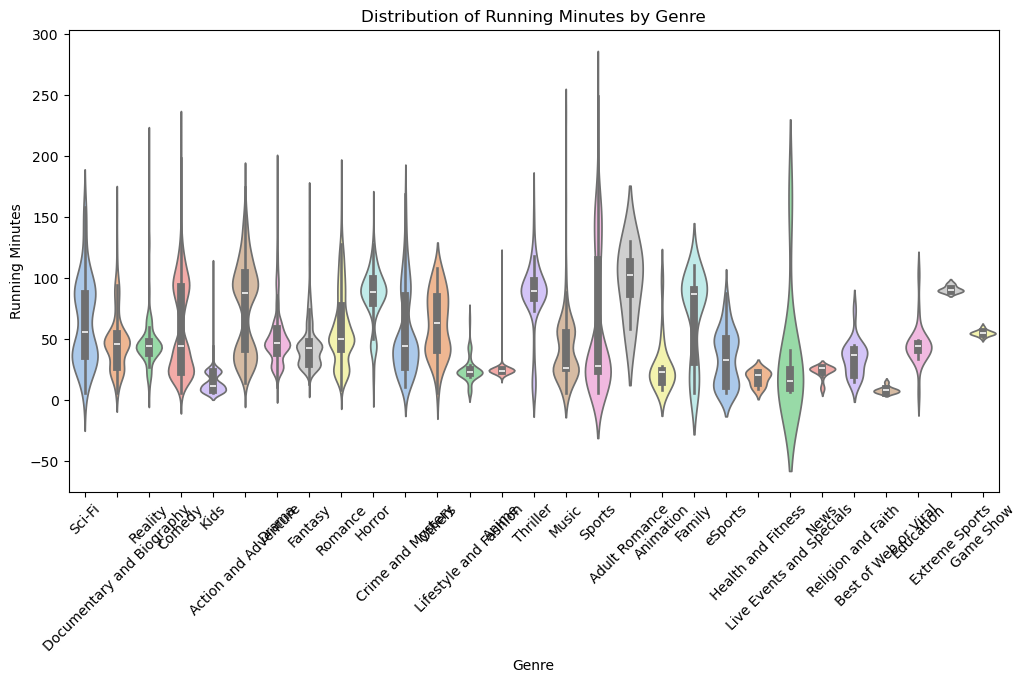

In [124]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=assets, x='genre', y='running_minutes', palette='pastel')
plt.title('Distribution of Running Minutes by Genre')
plt.xlabel('Genre')
plt.ylabel('Running Minutes')
plt.xticks(rotation=45)
plt.show()

# Just to make a visualization to see how this count for the all Running munites will look like. I don't think we can understand the quantitative value of 400000 minutes so might change it to days in milestone 3.

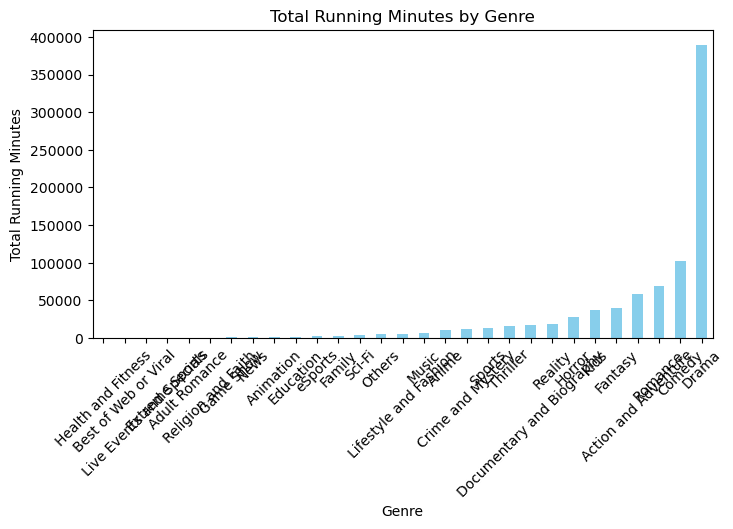

In [125]:
plt.figure(figsize=(8,4))
running_minutes_sum = assets.groupby('genre')['running_minutes'].sum().sort_values()
running_minutes_sum.plot(kind='bar', color='skyblue')
plt.title('Total Running Minutes by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Running Minutes')
plt.xticks(rotation=45)
plt.show()

# Out of the following visualizations i'll just keep a few of them(Genre Popularity, Total Running Minutes by Genre, Language Diversity) for the final insights. Will change that in the milestone 3.

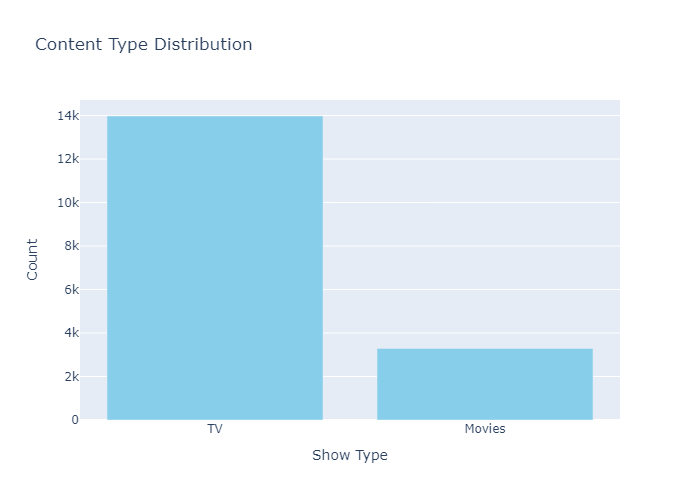

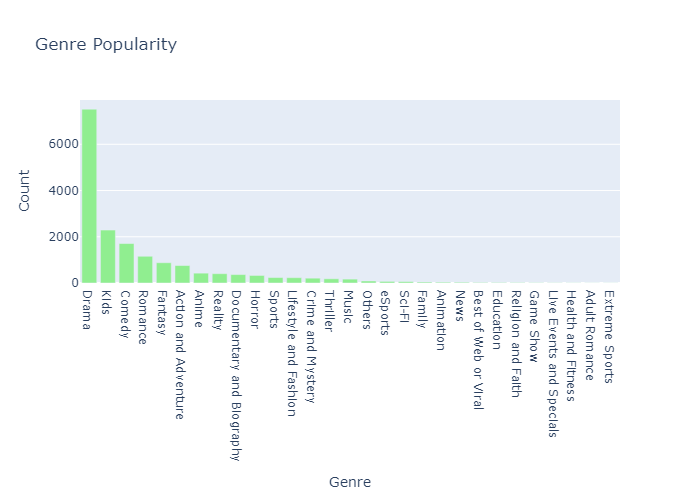

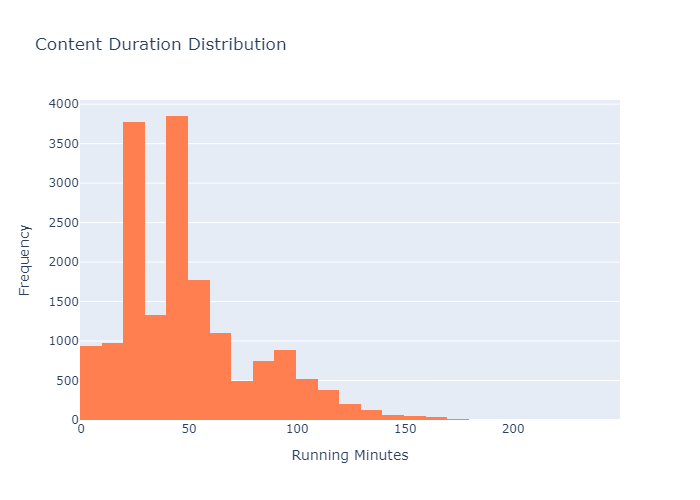

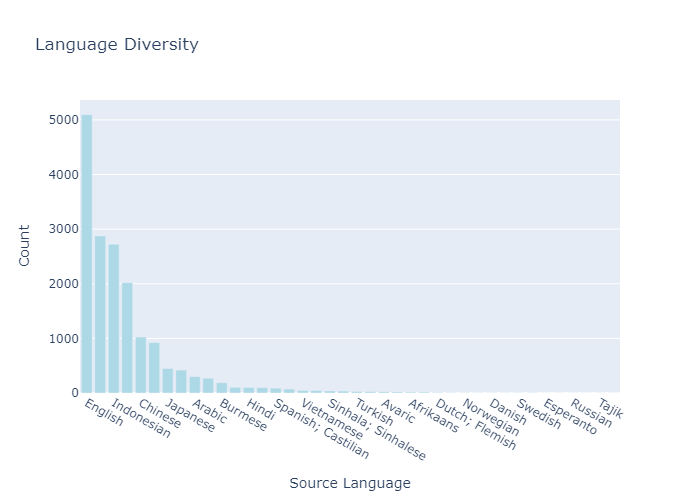

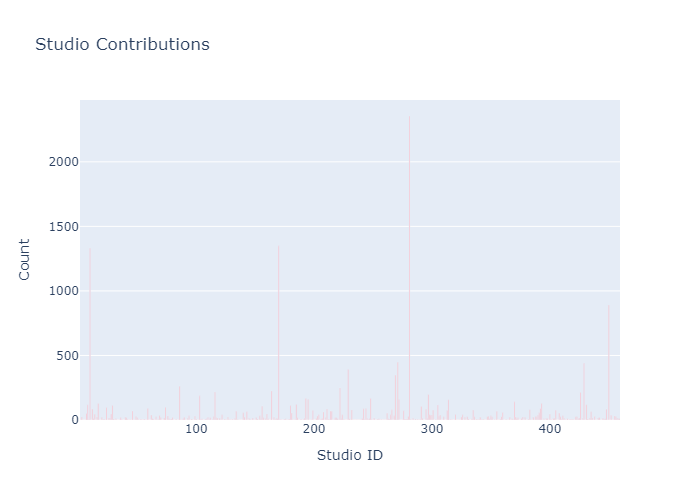

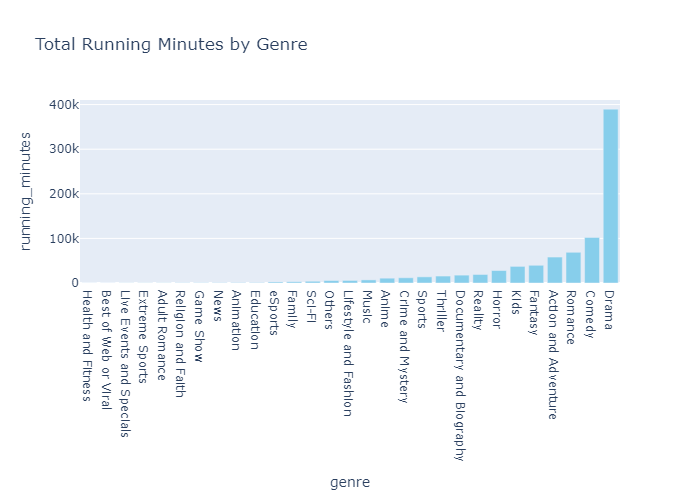

In [126]:
# 1. Content Type Distribution
show_type_counts = assets['show_type'].value_counts().reset_index()
show_type_counts.columns = ['Show Type', 'Count']
fig1 = px.bar(show_type_counts, x='Show Type', y='Count', color_discrete_sequence=['skyblue'],
              title="Content Type Distribution")
fig1.update_layout(xaxis_title="Show Type", yaxis_title="Count")

# 2. Genre Popularity
genre_counts = assets['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
fig2 = px.bar(genre_counts, x='Genre', y='Count', color_discrete_sequence=['lightgreen'],
              title="Genre Popularity")
fig2.update_layout(xaxis_title="Genre", yaxis_title="Count")

# 3. Content Duration Analysis
fig3 = px.histogram(assets, x='running_minutes', nbins=30, color_discrete_sequence=['coral'],
                    title="Content Duration Distribution")
fig3.update_layout(xaxis_title="Running Minutes", yaxis_title="Frequency")

# 4. Language Diversity
language_counts = assets['source_language'].value_counts().reset_index()
language_counts.columns = ['Source Language', 'Count']
fig4 = px.bar(language_counts, x='Source Language', y='Count', color_discrete_sequence=['lightblue'],
              title="Language Diversity")
fig4.update_layout(xaxis_title="Source Language", yaxis_title="Count")

# 5. Studio Contributions
studio_counts = assets['studio_id'].value_counts().reset_index()
studio_counts.columns = ['Studio ID', 'Count']
fig5 = px.bar(studio_counts, x='Studio ID', y='Count', color_discrete_sequence=['lightpink'],
              title="Studio Contributions")
fig5.update_layout(xaxis_title="Studio ID", yaxis_title="Count")

# 6. Total Running Minutes by Genre
running_minutes_sum = assets.groupby('genre')['running_minutes'].sum().sort_values().reset_index()
fig6 = px.bar(running_minutes_sum, x='genre', y='running_minutes', color_discrete_sequence=['skyblue'],
              title="Total Running Minutes by Genre")
fig6.update_layout(xaxis_title="Genre", yaxis_title="Total Running Minutes")


# Total Running Minutes by Genre
running_minutes_sum = assets.groupby('genre')['running_minutes'].sum().sort_values().reset_index()
fig6 = px.bar(
    running_minutes_sum, 
    x='genre', 
    y='running_minutes', 
    color_discrete_sequence=['skyblue'],
    title="Total Running Minutes by Genre"
)

# Display the figures
fig1.show()
pio.show(fig1, renderer="png")
fig2.show()
pio.show(fig2, renderer="png")
fig3.show()
pio.show(fig3, renderer="png")
fig4.show()
pio.show(fig4, renderer="png")
fig5.show()
pio.show(fig5, renderer="png")
fig6.show()
pio.show(fig6, renderer="png")

# Implementing the usage of buttons in this section and will cut the code down during the milestone 3 also will reduce the number of visualizations in this section.

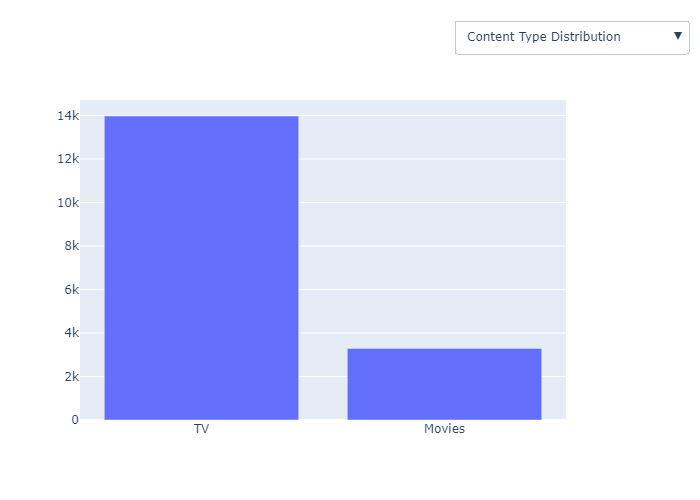

In [127]:
# Prepare data for each plot
# Content Type Distribution
show_type_counts = assets['show_type'].value_counts().reset_index()
show_type_counts.columns = ['Show Type', 'Count']
fig1 = px.bar(
    show_type_counts, 
    x='Show Type',
    y='Count', 
    color_discrete_sequence=['skyblue'],
    title="Content Type Distribution"
)

# Genre Popularity
genre_counts = assets['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
fig2 = px.bar(
    genre_counts, 
    x='Genre', 
    y='Count', 
    color_discrete_sequence=['lightgreen'],
    title="Genre Popularity"
)

# Content Duration Analysis
fig3 = px.histogram(
    assets, 
    x='running_minutes', 
    nbins=30, 
    color_discrete_sequence=['coral'],
    title="Content Duration Distribution"
)

# Language Diversity
language_counts = assets['source_language'].value_counts().reset_index()
language_counts.columns = ['Source Language', 'Count']
fig4 = px.bar(
    language_counts, 
    x='Source Language', 
    y='Count', 
    color_discrete_sequence=['lightblue'],
    title="Language Diversity"
)

# Studio Contributions
studio_counts = assets['studio_id'].value_counts().reset_index()
studio_counts.columns = ['Studio ID', 'Count']
fig5 = px.bar(
    studio_counts, 
    x='Studio ID', 
    y='Count', 
    color_discrete_sequence=['lightpink'],
    title="Studio Contributions"
)

# Total Running Minutes by Genre
running_minutes_sum = assets.groupby('genre')['running_minutes'].sum().sort_values().reset_index()
fig6 = px.bar(
    running_minutes_sum, 
    x='genre', 
    y='running_minutes', 
    color_discrete_sequence=['skyblue'],
    title="Total Running Minutes by Genre"
)

# Combine plots in a single figure with buttons
fig = go.Figure()

# Add each plot as a separate trace and hide all except the first one
fig.add_trace(
    go.Bar(
        x=show_type_counts['Show Type'],
        y=show_type_counts['Count'], 
        name="Content Type ",
        visible=True
    ))

fig.add_trace(
    go.Bar(
        x=genre_counts['Genre'], 
        y=genre_counts['Count'], 
        name="Genre Popularity", 
        visible=False
    ))

fig.add_trace(
    go.Histogram(
        x=assets['running_minutes'], 
        name="Content Duration Analysis", 
        visible=False
    ))

fig.add_trace(
    go.Bar(
        x=language_counts['Source Language'], 
        y=language_counts['Count'], 
        name="Language Diversity", 
        visible=False
    ))

fig.add_trace(
    go.Bar(
        x=studio_counts['Studio ID'], 
        y=studio_counts['Count'], 
        name="Studio Contributions", 
        visible=False
    ))

fig.add_trace(
    go.Bar(
        x=running_minutes_sum['genre'], 
        y=running_minutes_sum['running_minutes'], 
        name="Total Running Minutes by Genre", 
        visible=False))

# Define button actions
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction="down",
            showactive=True,
            x=1.25,
            y=1.25,
            buttons=list([
                dict(label="Content Type Distribution",
                     method="update",
                     args=[{"visible": [True, False, False, False, False, False]},
                           {"title": "Content Type Distribution",
                           'xaxis': {'title': 'Show Type'},
                           'yaxis': {'title': 'Count'}}]),
                dict(label="Genre Popularity",
                     method="update",
                     args=[{"visible": [False, True, False, False, False, False]},
                           {"title": "Genre Popularity",
                           'xaxis': {'title': 'Genre'},
                           'yaxis': {'title': 'Count'}}]),
                dict(label="Content Duration Analysis",
                     method="update",
                     args=[{"visible": [False, False, True, False, False, False]},
                           {"title": "Content Duration Distribution",
                           'xaxis': {'title': 'Running Munites'},
                           'yaxis': {'title': 'Frequency'}}]),
                dict(label="Language Diversity",
                     method="update",
                     args=[{"visible": [False, False, False, True, False, False]},
                           {"title": "Language Diversity",
                           'xaxis': {'title': 'Language'},
                           'yaxis': {'title': 'Count'}}]),
                dict(label="Studio Contributions",
                     method="update",
                     args=[{"visible": [False, False, False, False, True, False]},
                           {"title": "Studio Contributions",
                           'xaxis': {'title': 'Studio ID'},
                           'yaxis': {'title': 'Count'}}]),
                dict(label="Total Running Minutes by Genre",
                     method="update",
                     args=[{"visible": [False, False, False, False, False, True]},
                           {"title": "Total Running Minutes by Genre",
                           'xaxis': {'title': 'Genre'},
                           'yaxis': {'title': 'Total Running Munites'}}]),
            ]),
        )
    ]
)

# Display the final plot
fig.show()
pio.show(fig, renderer="png")

# For the following visualizations I have just done some of the basic graphs and still looking for the some of the key graphs that i'll keep for the final.

# demographics.csv Visualizations

In [128]:
demographics.shape

(102745, 6)

In [129]:
demographics.columns

Index(['user_id', 'platform', 'level_1', 'level_2', 'level_3',
       'confidence_score'],
      dtype='object')

In [130]:
# getting NaN values for each column

nan_counts = demographics.isna().sum()
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
user_id             0
platform            0
level_1             0
level_2             0
level_3             0
confidence_score    0
dtype: int64


Here I want to plot a visualization for the following: Income, Age, Gender and see how it has changed accross the platform.

In [131]:
# Defining the columns I want to retrieve unique values for

columns_to_check = ['platform', 'level_1', 'level_2', 'level_3']

# Loop through each specified column and print unique values

for column in columns_to_check:
    unique_values = demographics[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'platform':
['android' 'iOS' 'googlecast' 'web' 'android-tv' 'web-pwa' 'Panasonic'
 'Samsung Tizen' 'Vewd' 'webOS' 'Roku' 'COTV' 'Samsung Orsay']


Unique values in 'level_1':
['Demographics']


Unique values in 'level_2':
['Income' 'Age' 'Gender']


Unique values in 'level_3':
['Medium' 'Low' 'High' '25 - 34' '< 18' '18 - 24' 'Male' 'Female'
 '35 - 44' '55+' '45 - 54']




In [132]:
# Check for duplicate values in the 'country_name' column
duplicates = demographics['user_id'].duplicated()

# Display rows with duplicates
print(demographics[duplicates])

# If you want to check how many duplicate values are there:
print(f"Number of duplicate values: {duplicates.sum()}")

              user_id platform       level_1 level_2  level_3  \
542     1606317768818  android  Demographics     Age  25 - 34   
558      231928234051      iOS  Demographics     Age  18 - 24   
688      695784702029  android  Demographics     Age  18 - 24   
952     1142461300917  android  Demographics  Gender   Female   
986     1580547965113  android  Demographics  Gender   Female   
...               ...      ...           ...     ...      ...   
102740    34359738459  android  Demographics     Age  25 - 34   
102741  1520418423157  android  Demographics     Age  18 - 24   
102742   274877907051      iOS  Demographics     Age  25 - 34   
102743  1382979469397  android  Demographics     Age  25 - 34   
102744   240518168604  android  Demographics     Age  25 - 34   

        confidence_score  
542             1.000000  
558             0.999999  
688             0.999997  
952             0.980183  
986             0.983270  
...                  ...  
102740          1.000000  
102

# Out of the following graphs I'm inclined towards keeping only Platform Popularity Among Demographics graph

# Age Group Distribution, Income Level Comparison they are not distributed quite effectively in the dataset and it can be improved but insights might be biased so I'll noty be using this for insights.

# Heatmap is not of any use in this context as it is already a confidence score and it will not give any new insights. 

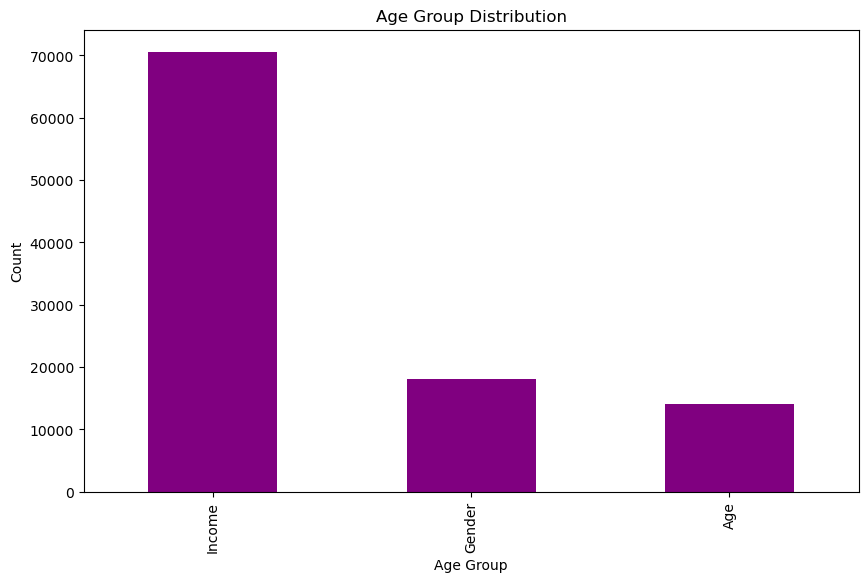

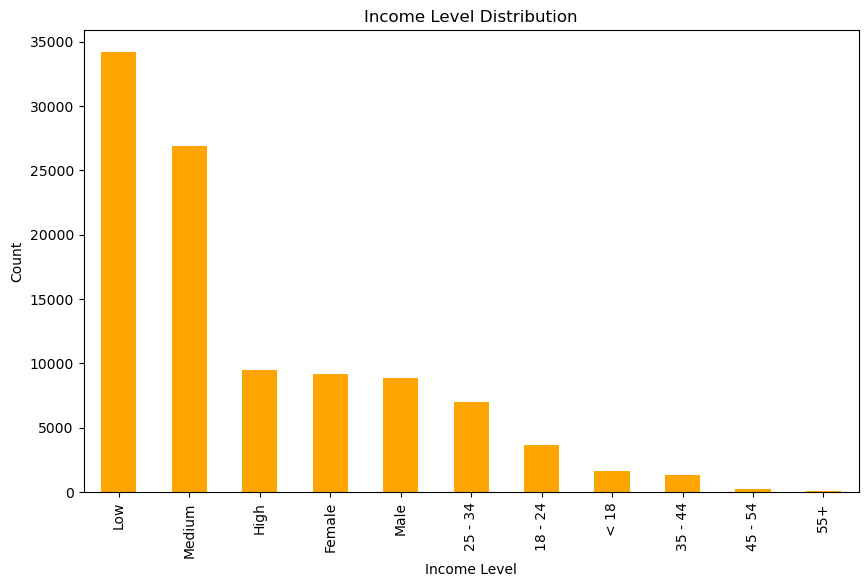

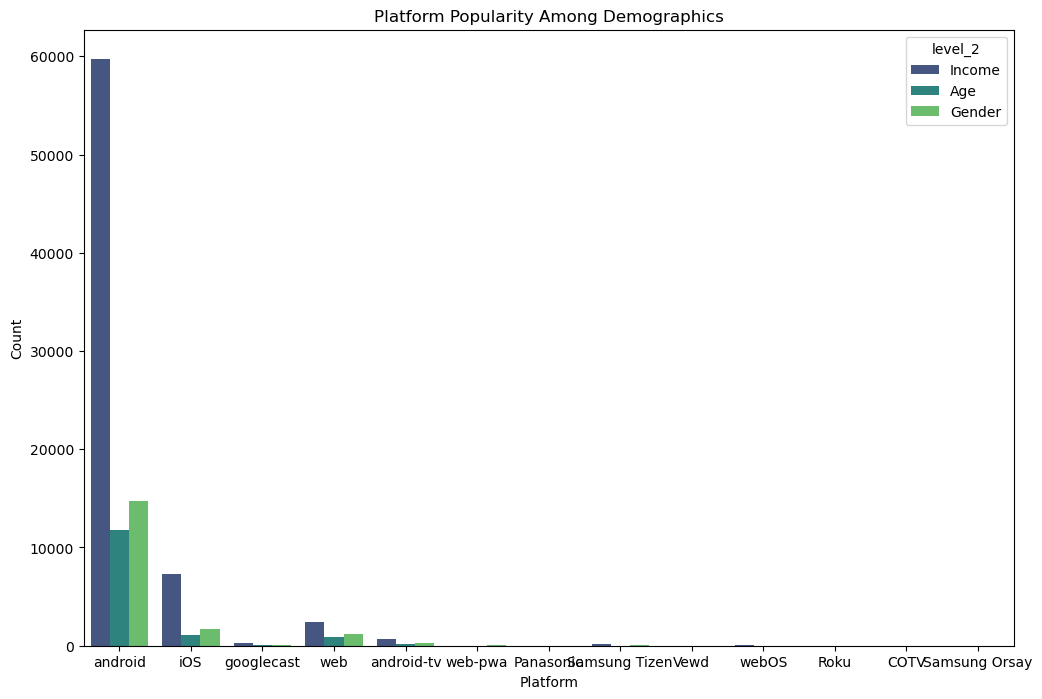

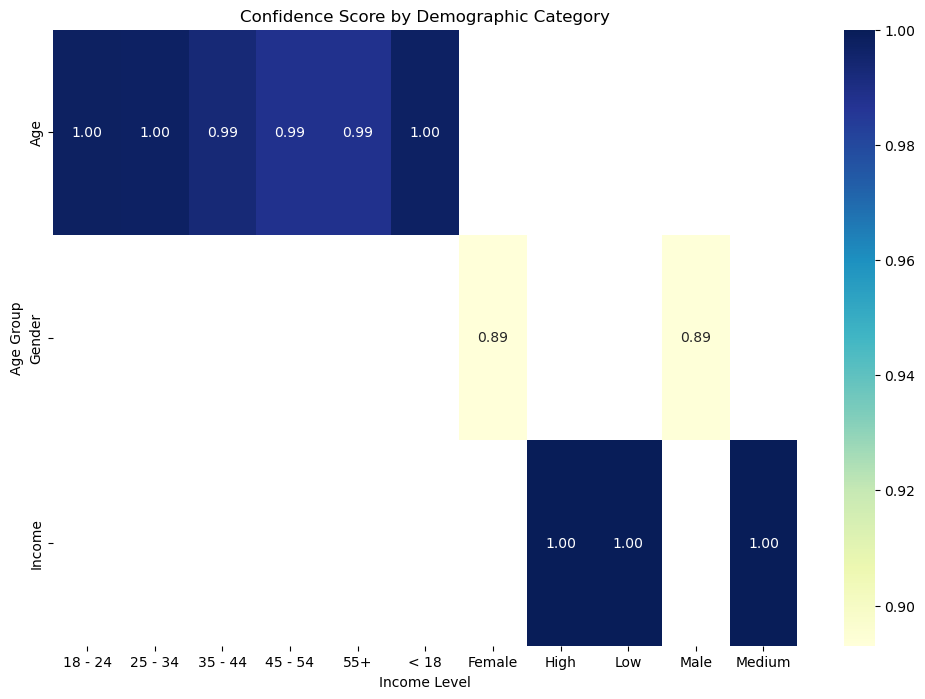

In [133]:
# 1. Age Group Distribution
plt.figure(figsize=(10, 6))
demographics['level_2'].value_counts().plot(kind='bar', color='purple')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# 2. Income Level Comparison
plt.figure(figsize=(10, 6))
demographics['level_3'].value_counts().plot(kind='bar', color='orange')
plt.title('Income Level Distribution')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.show()

# 3. Platform Popularity Among Demographics
plt.figure(figsize=(12, 8))
sns.countplot(x='platform', hue='level_2', data=demographics, palette='viridis')
plt.title('Platform Popularity Among Demographics')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

# 4. Confidence Score Heatmap
confidence_pivot = demographics.pivot_table(values='confidence_score', index='level_2', columns='level_3')
plt.figure(figsize=(12, 8))
sns.heatmap(confidence_pivot, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Confidence Score by Demographic Category')
plt.xlabel('Income Level')
plt.ylabel('Age Group')
plt.show()

# plays.csv Visualizations

In [134]:
plays.shape

(542157, 4)

In [135]:
plays.columns

Index(['user_id', 'platform', 'asset_id', 'minutes_viewed'], dtype='object')

In [136]:
nan_counts = plays.isna().sum()
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
user_id           0
platform          0
asset_id          0
minutes_viewed    0
dtype: int64


In [137]:
plays['platform'].unique()

array(['android', 'iOS', 'android-tv', 'web', 'webOS', 'web-embed',
       'Samsung Tizen', 'Samsung Orsay', 'Vewd', 'googlecast', 'web-pwa',
       'Roku', 'Panasonic', 'Netrange'], dtype=object)

# Out of the following graphs I want to keep some of them, haven't yet decided which one also I need at arrange this data in a better way so that it'll have a better understanding.

# User Activity Distribution is not a very good metrics to represent as it doesn't specifically provide any important information.

# I can use Most-Viewed Content to find which movie or TV show has been most viewed in which country and by what category of audience.

# I need to change the yaxis range for the graph of Content Viewership by Platform.

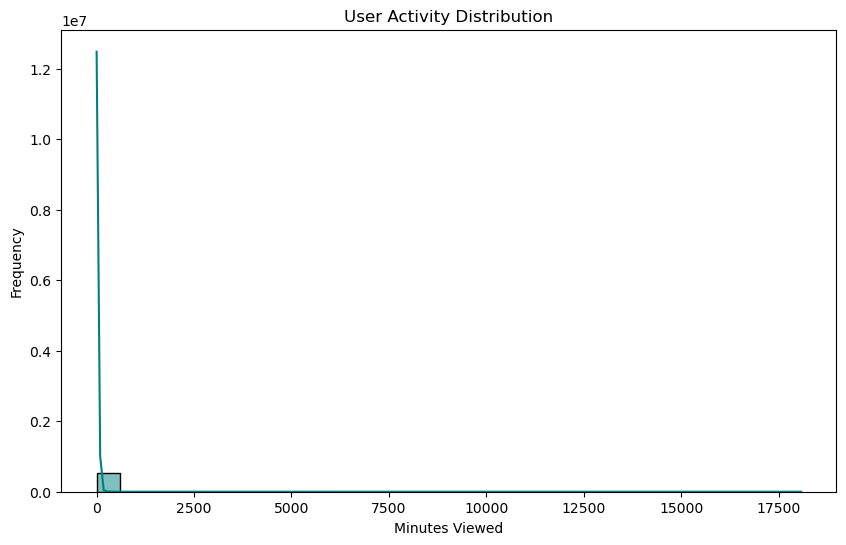

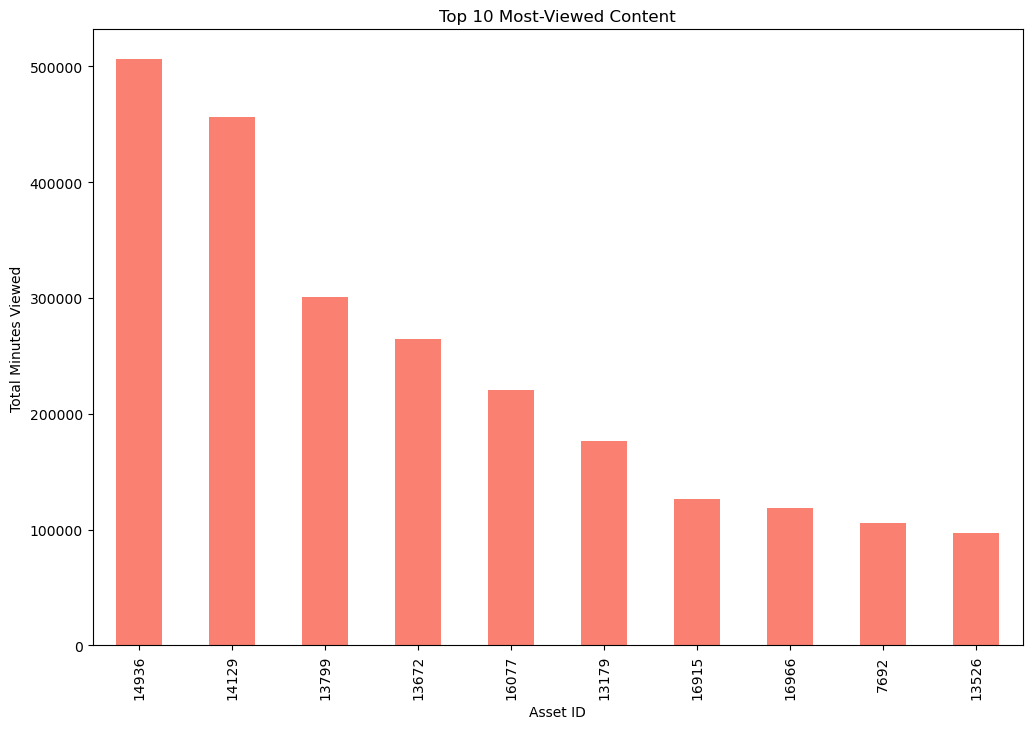

C:\Users\Admin\AppData\Local\Temp\ipykernel_1656\2972434881.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




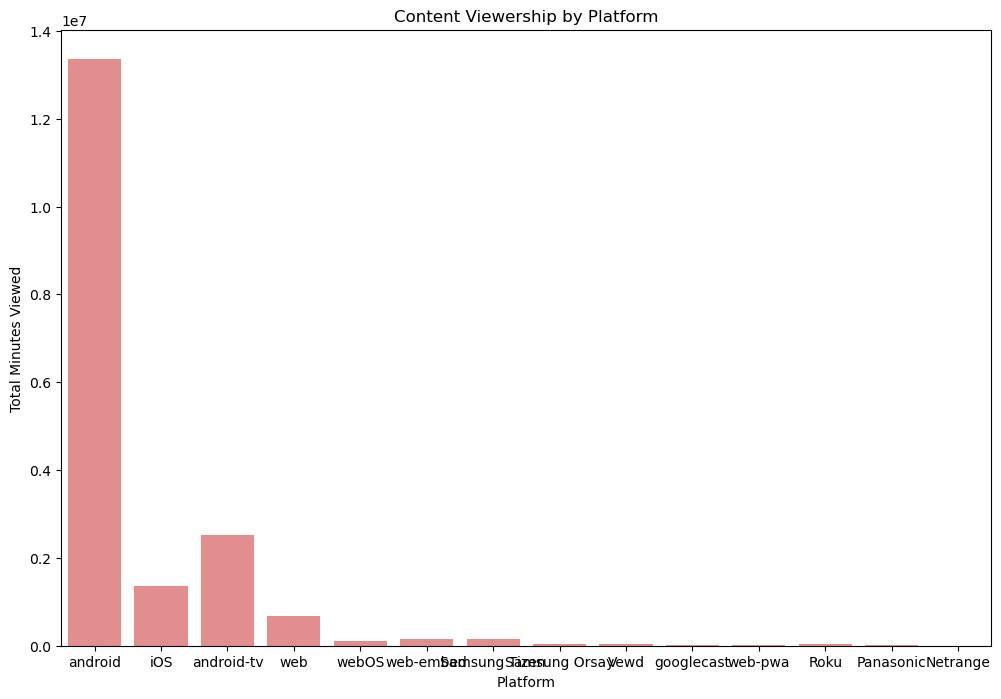

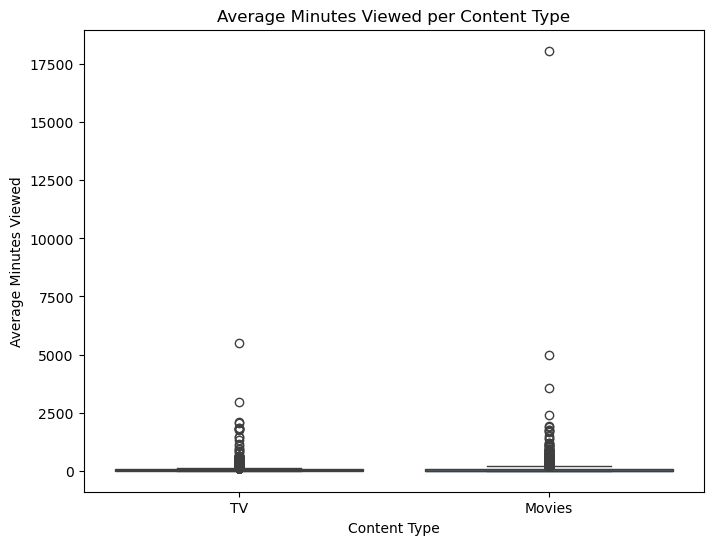

In [138]:
# 1. User Activity Distribution
plt.figure(figsize=(10, 6))
sns.histplot(plays['minutes_viewed'], kde=True, color='teal', bins=30)
plt.title('User Activity Distribution')
plt.xlabel('Minutes Viewed')
plt.ylabel('Frequency')
plt.show()

# 2. Most-Viewed Content
plt.figure(figsize=(12, 8))
plays.groupby('asset_id')['minutes_viewed'].sum().nlargest(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Most-Viewed Content')
plt.xlabel('Asset ID')
plt.ylabel('Total Minutes Viewed')
plt.show()

# 3. Content Viewership by Platform
plt.figure(figsize=(12, 8))
sns.barplot(x='platform', y='minutes_viewed', data=plays, estimator=sum, ci=None, color='lightcoral')
plt.title('Content Viewership by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Minutes Viewed')
plt.show()

# 4. Average Viewing Time per Content Type
content_type_viewership = plays.merge(assets[['asset_id', 'show_type']], on='asset_id')
plt.figure(figsize=(8, 6))
sns.boxplot(x='show_type', y='minutes_viewed', data=content_type_viewership)
plt.title('Average Minutes Viewed per Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Minutes Viewed')
plt.show()

# psychographics.csv Visualizations

In [139]:
psychographics.shape

(475089, 6)

In [140]:
psychographics.columns

Index(['user_id', 'platform', 'level_1', 'level_2', 'level_3',
       'confidence_score'],
      dtype='object')

In [141]:
nan_counts = psychographics.isna().sum()
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
user_id                0
platform               0
level_1                0
level_2                0
level_3             7747
confidence_score       0
dtype: int64


In [142]:
# Defining the columns I want to retrieve unique values for

columns_to_check = ['platform', 'level_1', 'level_2', 'level_3']

# Loop through each specified column and print unique values

for column in columns_to_check:
    unique_values = psychographics[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print("\n")

Unique values in 'platform':
['android' 'android-tv' 'web' 'iOS' 'web-embed' 'Vewd' 'web-pwa'
 'Samsung Tizen' 'webOS' 'googlecast' 'Panasonic' 'Roku' 'Samsung Orsay'
 'Netrange' 'COTV']


Unique values in 'level_1':
['Psychographics']


Unique values in 'level_2':
['Social Media Fans' 'Movies Lovers' 'Mobile Enthusiasts' 'TV Lovers'
 'Sports Fans' 'Music Lovers' 'iflix Viewing Behaviour' 'Travellers'
 'News Junkies & Avid Readers']


Unique values in 'level_3':
['\\"\\"' 'Romance Movies Fans' 'Comedy Movies Fans' 'Horror Movies Fans'
 'Action and Adventure Movies Fans' 'Family Movies Fans'
 'Drama Movies Fans' 'Religion and Faith Movies Fans' 'Kids Movies Fans'
 'Thriller Movies Fans' 'Sci-Fi Movies Fans' 'Fantasy Movies Fans'
 'Others Movies Fans' 'English Movies Fans' 'Indonesian Movies Fans'
 'Tagalog Movies Fans' 'Thai Movies Fans' 'Hindi Movies Fans'
 'Nepali Movies Fans' 'Korean Movies Fans' 'Vietnamese Movies Fans'
 'High Data Users' 'Comedy TV Fans' 'Anime TV Fans' 'Drama TV F

In [143]:
# Check for duplicate values in the 'country_name' column
duplicates = psychographics['user_id'].duplicated()

# Display rows with duplicates
print(psychographics[duplicates])

# If you want to check how many duplicate values are there:
print(f"Number of duplicate values: {duplicates.sum()}")

              user_id    platform         level_1                  level_2  \
37       137438953840     android  Psychographics            Movies Lovers   
208     1391569404252     android  Psychographics       Mobile Enthusiasts   
705      386547056820     android  Psychographics  iflix Viewing Behaviour   
732     1133871366223     android  Psychographics  iflix Viewing Behaviour   
826      858993459349     android  Psychographics            Movies Lovers   
...               ...         ...             ...                      ...   
475084  1228360646659  android-tv  Psychographics                TV Lovers   
475085   214748365245     android  Psychographics       Mobile Enthusiasts   
475086   953482739908     android  Psychographics       Mobile Enthusiasts   
475087   712964571361     android  Psychographics       Mobile Enthusiasts   
475088   360777252917     android  Psychographics       Mobile Enthusiasts   

                   level_3  confidence_score  
37      Comedy M

# I was thinking of plotting the level 2 by level 3 content as it'll give insights about the different tags used for different levels. Also we have already seen in assets.csv that android is the major platform used. So I don't think we don't need that again.

# Again this Heatmap doesn't represent any new information that has not already been provided with the confidence score.

# Need to change the color scheme to somethingmore relevant.

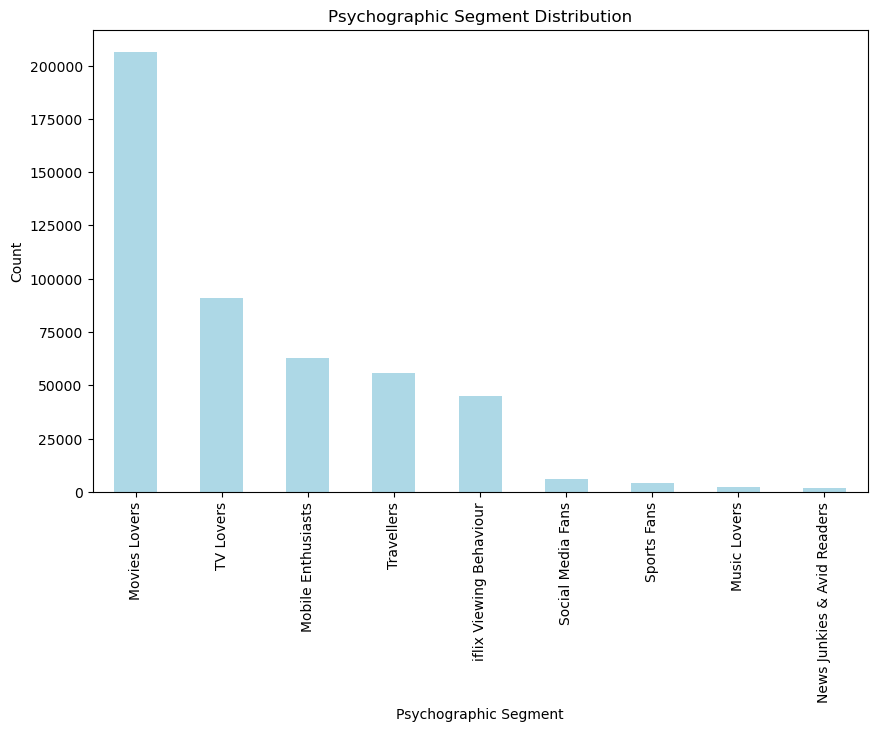

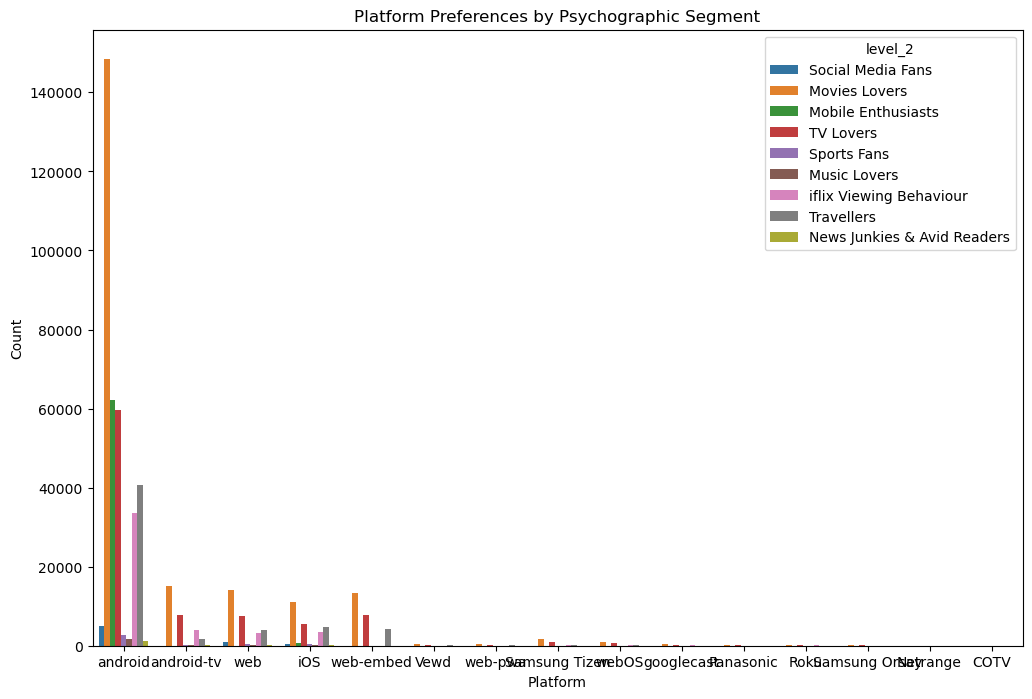

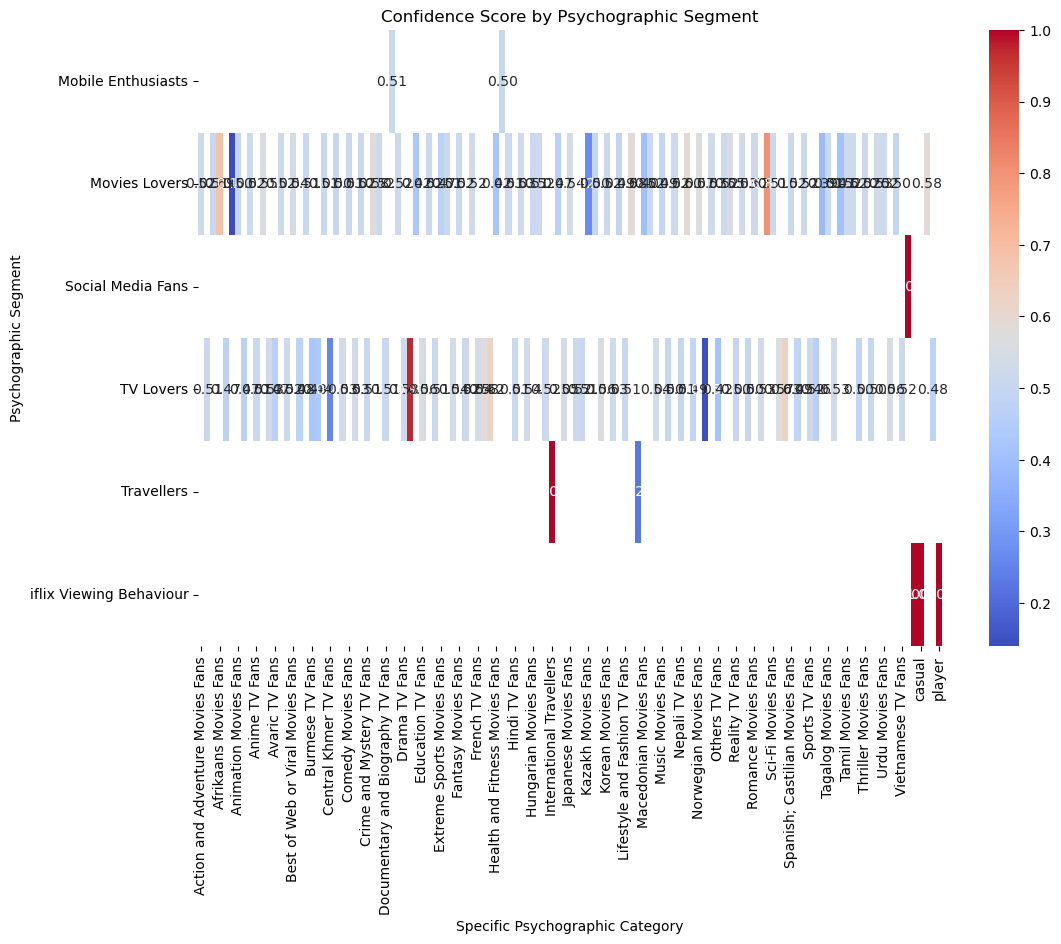

In [144]:
# 1. Psychographic Segment Distribution
plt.figure(figsize=(10, 6))
psychographics['level_2'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Psychographic Segment Distribution')
plt.xlabel('Psychographic Segment')
plt.ylabel('Count')
plt.show()

# 2. Platform Preferences by Psychographic Segment
plt.figure(figsize=(12, 8))
sns.countplot(x='platform', hue='level_2', data=psychographics)
plt.title('Platform Preferences by Psychographic Segment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

# 3. Confidence Score by Psychographic Segment
psychographic_confidence_pivot = psychographics.pivot_table(values='confidence_score', index='level_2', columns='level_3')
plt.figure(figsize=(12, 8))
sns.heatmap(psychographic_confidence_pivot, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Confidence Score by Psychographic Segment')
plt.xlabel('Specific Psychographic Category')
plt.ylabel('Psychographic Segment')
plt.show()

# users.csv Visualizations

In [145]:
users.shape

(110639, 2)

In [146]:
users.columns

Index(['user_id', 'country_code'], dtype='object')

In [147]:
nan_counts = users.isna().sum()
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
user_id         0
country_code    0
dtype: int64


Here I'm trying merge this dataset with the assets.csv to get details about what shows are frequently viewed in which country, so on and so forth.

In [148]:
users['country_code'].unique()

array(['ID', 'MY', 'PH', 'TH', 'PK', 'BD', 'MM', 'VN', 'KH', 'NP', 'MV',
       'EG', 'SA', 'MA', 'LK', 'IQ', 'TZ', 'UG', 'KE', 'GH', 'NG', 'SD',
       'ZW', 'LA', 'BH', 'BN', 'SG', 'ET', 'KW', 'JO', 'MU', 'LB', 'US',
       'ZM', 'JP', 'IN', 'KR', 'GB', 'QA', 'TN'], dtype=object)

In [149]:
# Create a dictionary to map country codes to their full names
country_name = {
    'ID': 'Indonesia',
    'MY': 'Malaysia',
    'PH': 'Philippines',
    'TH': 'Thailand',
    'PK': 'Pakistan',
    'BD': 'Bangladesh',
    'MM': 'Myanmar',
    'VN': 'Vietnam',
    'KH': 'Cambodia',
    'NP': 'Nepal',
    'MV': 'Maldives',
    'EG': 'Egypt',
    'SA': 'Saudi Arabia',
    'MA': 'Morocco',
    'LK': 'Sri Lanka',
    'IQ': 'Iraq',
    'TZ': 'Tanzania',
    'UG': 'Uganda',
    'KE': 'Kenya',
    'GH': 'Ghana',
    'NG': 'Nigeria',
    'SD': 'Sudan',
    'ZW': 'Zimbabwe',
    'LA': 'Laos',
    'BH': 'Bahrain',
    'BN': 'Brunei',
    'SG': 'Singapore',
    'ET': 'Ethiopia',
    'KW': 'Kuwait',
    'JO': 'Jordan',
    'MU': 'Mauritius',
    'LB': 'Lebanon',
    'US': 'United States',
    'ZM': 'Zambia',
    'JP': 'Japan',
    'IN': 'India',
    'KR': 'South Korea',
    'GB': 'United Kingdom',
    'QA': 'Qatar',
    'TN': 'Tunisia'
}

# Replace the country codes in the 'country_code' column
users['country_code'] = users['country_code'].replace(country_name)

# Display the updated DataFrame
users.head(1)

,user_id,country_code
0,781684047872,Indonesia


In [150]:
# changing the column name

users.rename(columns={'country_code': 'country_name'}, inplace=True)
users.head(1)

,user_id,country_name
0,781684047872,Indonesia


In [151]:
# Check for duplicate values in the 'country_name' column
duplicates = users['country_name'].duplicated()

# Display rows with duplicates
print(users[duplicates])

# If you want to check how many duplicate values are there:
print(f"Number of duplicate values: {duplicates.sum()}")

              user_id country_name
2        781684047874    Indonesia
3        781684047875    Indonesia
4        781684047876    Indonesia
5        781684047877    Indonesia
6        781684047878    Indonesia
...               ...          ...
110634  1494648619559   Bangladesh
110635  1494648619560    Indonesia
110636  1494648619561    Indonesia
110637  1494648619562    Indonesia
110638  1494648619563        Nepal

[110599 rows x 2 columns]
Number of duplicate values: 110599


# Top Countries by User Count and User Engagement per Country are really ugly design. I still want to use the same variables but will use different graphs which will be easy to understand.

# Also I want to create a geographical map for the understanding of how .often the iflix portal is being used in which country and by which audience.

# I will keep one of the following graphs: User Distribution by Country, Top Countries by User Count, User Engagement per Country.

# Content Consumption by Country and I want to change the range of the yaxis. 

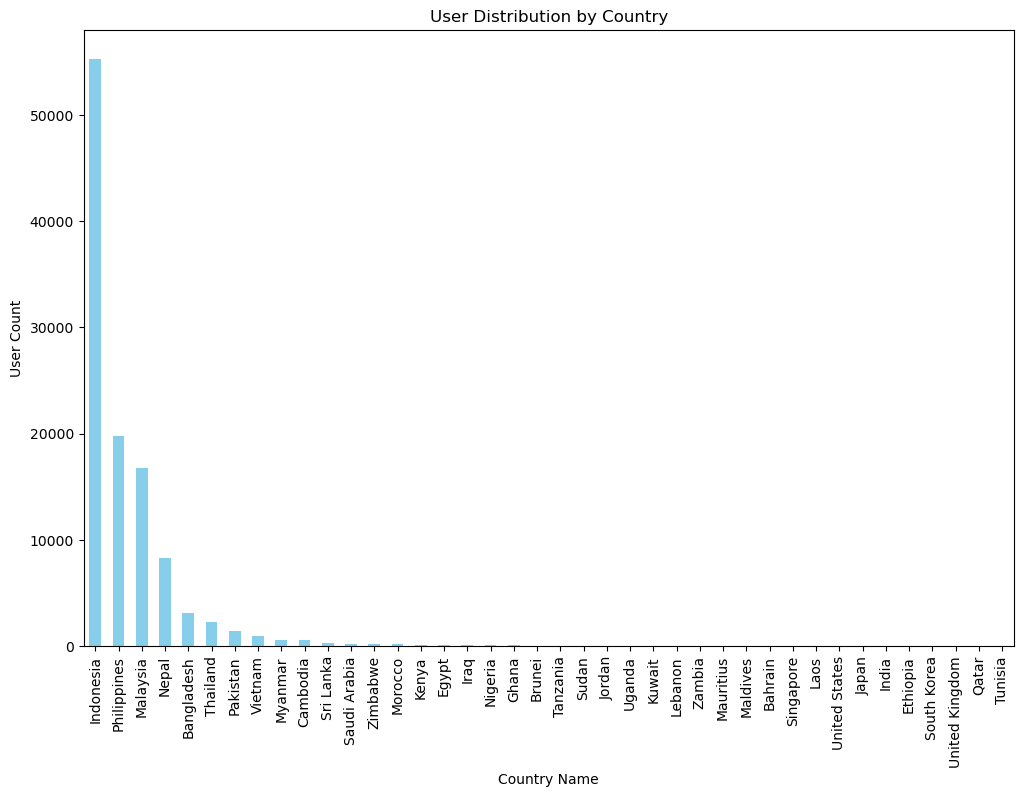

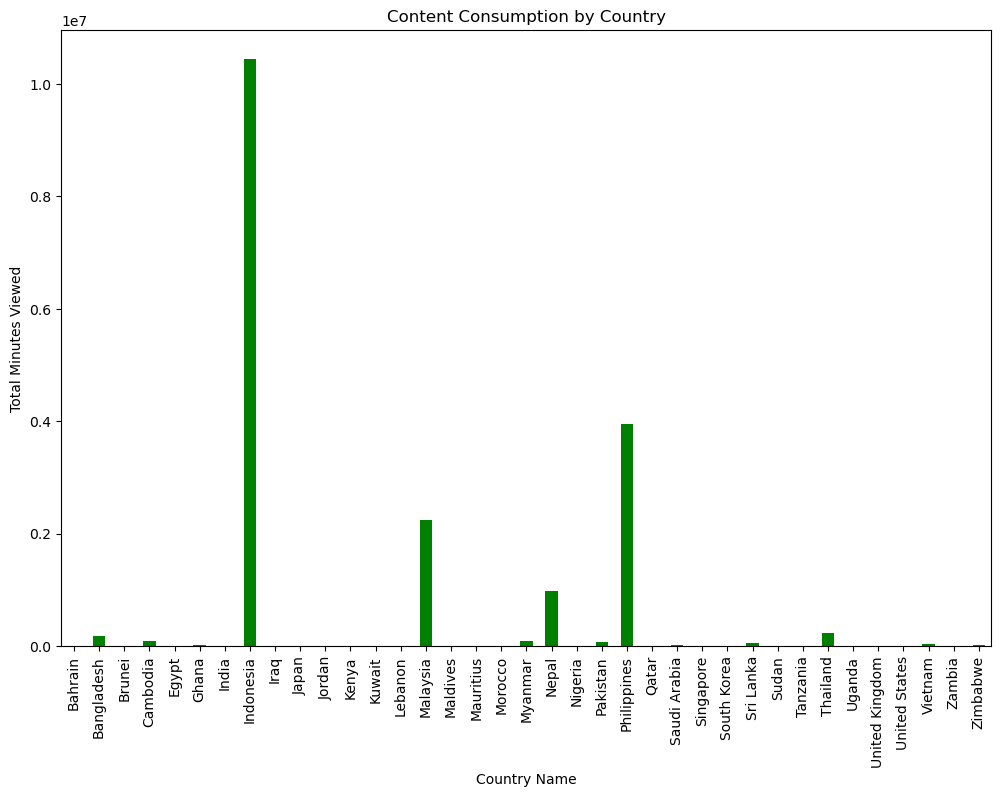

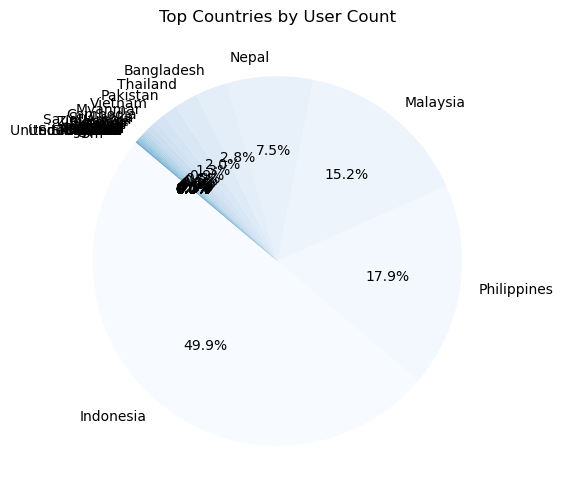

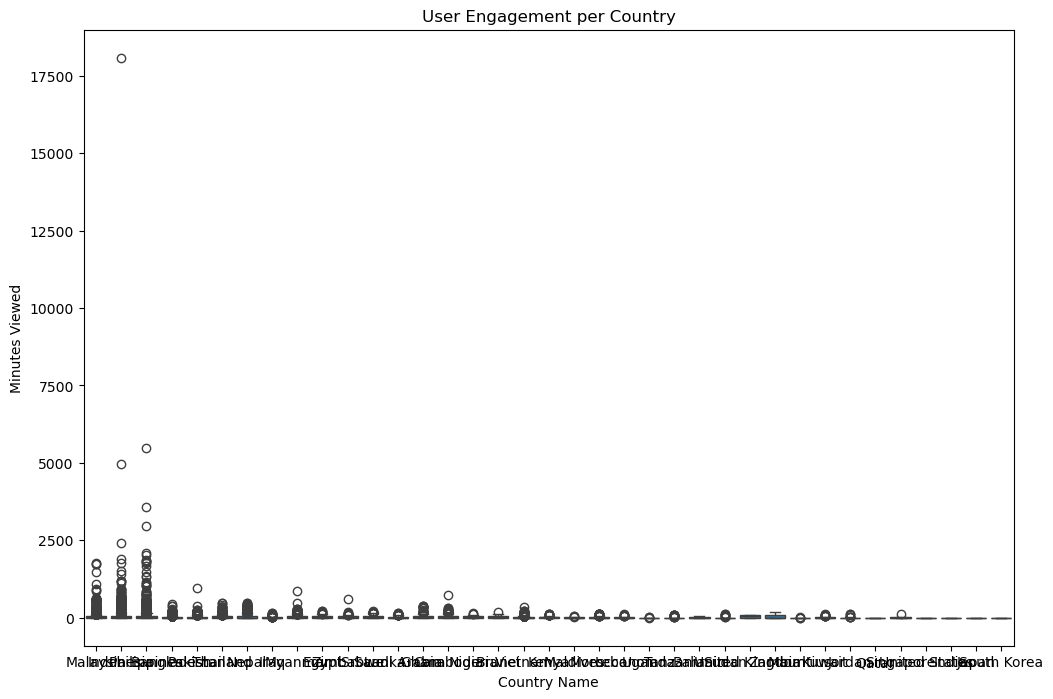

In [152]:
# 1. User Distribution by Country
plt.figure(figsize=(12, 8))
users['country_name'].value_counts().plot(kind='bar', color='skyblue')
plt.title('User Distribution by Country')
plt.xlabel('Country Name')
plt.ylabel('User Count')
plt.show()

# 2. Content Consumption by Country
country_content = plays.merge(users[['user_id', 'country_name']], on='user_id').groupby('country_name')['minutes_viewed'].sum()
plt.figure(figsize=(12, 8))
country_content.plot(kind='bar', color='green')
plt.title('Content Consumption by Country')
plt.xlabel('Country Name')
plt.ylabel('Total Minutes Viewed')
plt.show()

# 3. Top Countries by User Count
plt.figure(figsize=(10, 6))
users['country_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, cmap='Blues')
plt.title('Top Countries by User Count')
plt.ylabel('')
plt.show()

# 4. User Engagement per Country
user_engagement_country = plays.merge(users[['user_id', 'country_name']], on='user_id')
plt.figure(figsize=(12, 8))
sns.boxplot(x='country_name', y='minutes_viewed', data=user_engagement_country)
plt.title('User Engagement per Country')
plt.xlabel('Country Name')
plt.ylabel('Minutes Viewed')
plt.show()

# For this milestone, I created some visualizations and decided which visualizations to keep or not based on their usasge and feasibility to understand. These visualizations have a various relationships within the data, gaining valuable insights. For the milestone 3, I’ll refine the the visualizations by adjusting the color palette to enhance presentation quality. I might also create a dashboard depending on the usability of the insights. I also want to add more description for the graphs for my final project presentation.